# **Lab 1.1 : NEURAL NETWORKS - Multilayer Perceptron (MLP)**

In [1]:
import tensorflow as tf
tf.__version__

'2.1.0'

## **Step 1: Import library**




In [2]:
import numpy as np
from numpy.random import seed
seed(42)
import tensorflow as tf


from tensorflow.keras.layers import Dense,Input, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [6]:
nb_epochs = 35
batch_size = 32
nb_classes = 10
class_name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}


In [7]:
cifar = tf.keras.datasets.cifar10

## **Step 2: Load data**

In [8]:
(x_train,y_train),(x_test,y_test) = cifar.load_data()
y_train, y_test = y_train.reshape(y_train.shape[0]), y_test.reshape(y_test.shape[0])
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

170500096/170498071 [==============================] - 19s 0us/step


In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
y_train.shape

(50000,)

In [11]:
y_test.shape

(10000,)

## **Step 3: Visualize example data**

In [12]:
def draw_img(i):
    im = x_train[i]
    c = y_train[i]
    plt.imshow(im)
    plt.title("Class %d (%s)" % (c, class_name[c]))
    plt.axis('on')

def draw_sample(X, y, n, rows=4, cols=4, imfile=None, fontsize=12):
    for i in range(0, rows*cols):
        plt.subplot(rows, cols, i+1)
        im = X[n+i].reshape(32,32,3)
        plt.imshow(im, cmap=plt.cm.binary)
        plt.title("{}".format(class_name[y[n+i]]), fontsize=fontsize)
        plt.axis('off')
        plt.subplots_adjust(wspace=0.6, hspace=0.01)

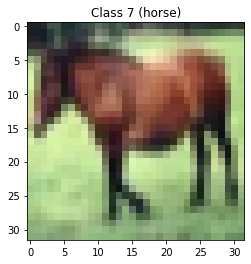

In [13]:
draw_img(7)

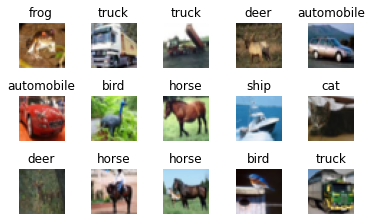

In [14]:
draw_sample(x_train, y_train, 0, 3, 5)

## **Step 4: Create Multilayer Perceptron Model**

> Dense layers are keras alias for Fully connected layers. These layers give the ability to classify the features learned by the CNN.



Overfit

In [15]:
input = Input(shape = (32,32,3))
x = Flatten()(input)
x = Dense(32, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs = input, outputs = prediction)

## **Step 5: Loss,  Optimizer, Early stopping**

In [16]:
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=2, min_lr=1e-6)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## **Step 6: Fit model**

In [17]:
h = model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs,
    validation_data=(x_test, y_test),shuffle=True, callbacks = [early_stopping,reduce_lr])

Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [==============================] - 2s 49us/sample - loss: 2.0414 - accuracy: 0.2290 - val_loss: 1.9524 - val_accuracy: 0.2580
Epoch 2/35
50000/50000 [==============================] - 2s 44us/sample - loss: 1.9278 - accuracy: 0.2754 - val_loss: 1.9053 - val_accuracy: 0.2859
Epoch 3/35
50000/50000 [==============================] - 2s 40us/sample - loss: 1.8960 - accuracy: 0.2865 - val_loss: 1.9220 - val_accuracy: 0.2848
Epoch 4/35
50000/50000 [==============================] - 2s 41us/sample - loss: 1.8828 - accuracy: 0.3014 - val_loss: 1.8663 - val_accuracy: 0.3041
Epoch 5/35
50000/50000 [==============================] - 2s 39us/sample - loss: 1.8722 - accuracy: 0.3040 - val_loss: 1.8654 - val_accuracy: 0.3061
Epoch 6/35
50000/50000 [==============================] - 2s 40us/sample - loss: 1.8659 - accuracy: 0.3081 - val_loss: 1.8650 - val_accuracy: 0.3043
Epoch 7/35
50000/50000 [==============================] 

## **Step 7: Plot loss and accuracy**


In [24]:
history_dict = h.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

Text(0, 0.5, 'Loss')

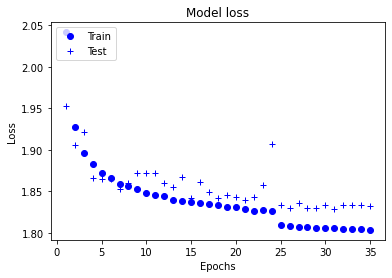

In [25]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')

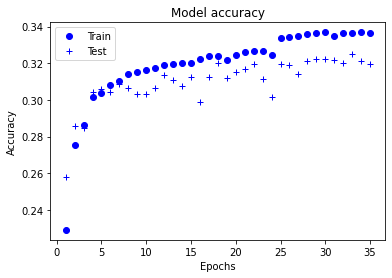

In [26]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

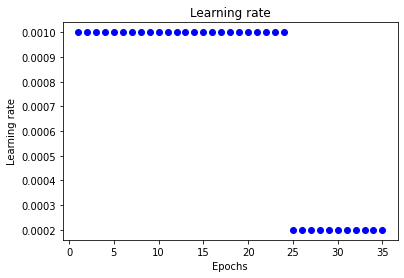

In [27]:
lr_values = history_dict['lr']

plt.plot(epochs, lr_values, 'bo')
plt.title('Learning rate')
plt.xlabel('Epochs')
plt.ylabel('Learning rate')

plt.show()

## **Step 8: Evaluate**

In [28]:
loss, accuracy = model.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.336660  ;  loss = 1.802905


In [29]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.319700  ;  loss = 1.832511


## **Step 9 : Confusion matrix**

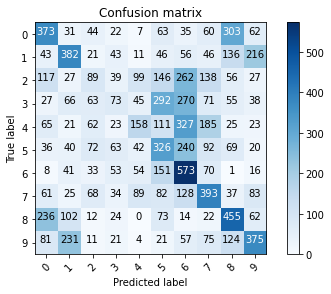

In [31]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# **Lab 1.2 : Add Dropout**

## **Step 10 : Add Dropout**

> Dropout is the method used to reduce overfitting. It forces the model to learn multiple independent representations of the same data by randomly disabling neurons in the learning phase. In our model, dropout will randomnly disable 20% of the neurons.



In [32]:
input = Input(shape = (32,32,3))
x = Flatten()(input)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation = 'relu')(x)
prediction = Dense(10, activation='softmax')(x)
model_2 = Model(inputs = input, outputs = prediction)

In [33]:
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=2, min_lr=1e-6)
model_2.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
h_2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs,
    validation_data=(x_test, y_test),shuffle=True, callbacks = [early_stopping,reduce_lr])

Train on 50000 samples, validate on 10000 samples
Epoch 1/35
50000/50000 [==============================] - 12s 230us/sample - loss: 1.9605 - accuracy: 0.2824 - val_loss: 1.7949 - val_accuracy: 0.3669
Epoch 2/35
50000/50000 [==============================] - 10s 203us/sample - loss: 1.8194 - accuracy: 0.3382 - val_loss: 1.7286 - val_accuracy: 0.3794
Epoch 3/35
50000/50000 [==============================] - 10s 198us/sample - loss: 1.7594 - accuracy: 0.3602 - val_loss: 1.6951 - val_accuracy: 0.3975
Epoch 4/35
50000/50000 [==============================] - 10s 198us/sample - loss: 1.7228 - accuracy: 0.3751 - val_loss: 1.6195 - val_accuracy: 0.4224
Epoch 5/35
50000/50000 [==============================] - 10s 201us/sample - loss: 1.6888 - accuracy: 0.3864 - val_loss: 1.6890 - val_accuracy: 0.3826
Epoch 6/35
50000/50000 [==============================] - 11s 217us/sample - loss: 1.6731 - accuracy: 0.3939 - val_loss: 1.6444 - val_accuracy: 0.4101
Epoch 7/35
50000/50000 [====================

In [35]:
model_2.save_weights('myModel_adam.h5')

In [36]:
history_dict_2 = h_2.history
history_dict_2.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

Text(0, 0.5, 'Loss')

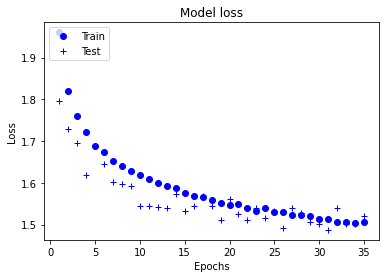

In [37]:
loss_values = history_dict_2['loss']
val_loss_values = history_dict_2['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')

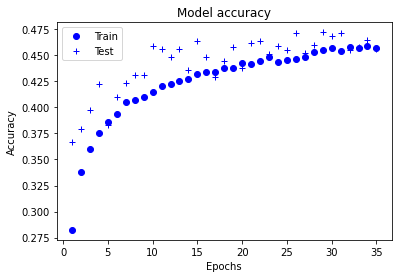

In [38]:
acc_values = history_dict_2['accuracy']
val_acc_values = history_dict_2['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [39]:
loss, accuracy = model_2.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.498040  ;  loss = 1.425014


In [40]:
loss, accuracy = model_2.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.455500  ;  loss = 1.521404


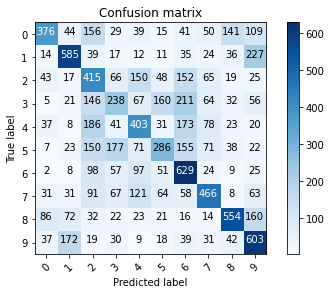

In [41]:
# Predict the values from the validation dataset
Y_pred = model_2.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

# **Step 11: Inspecting output**

In [42]:
predicted = model_2.predict(x_test)
predicted_classes = np.argmax(predicted,axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [43]:
print("Number of true predictions: ", len(correct_indices))
print("Number of false predictions:", len(incorrect_indices))

Number of true predictions:  4555
Number of false predictions: 5445


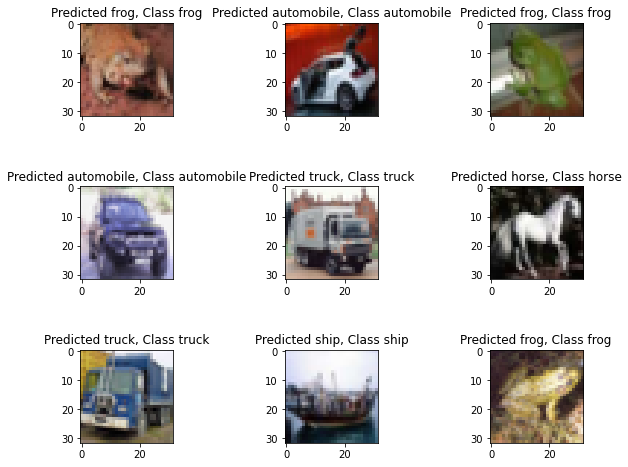

In [44]:
plt.rcParams['figure.figsize'] = (9,9) 
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_name[predicted_classes[correct]], class_name[y_test[correct]]))
    plt.subplots_adjust(wspace=1.2, hspace=0.01)

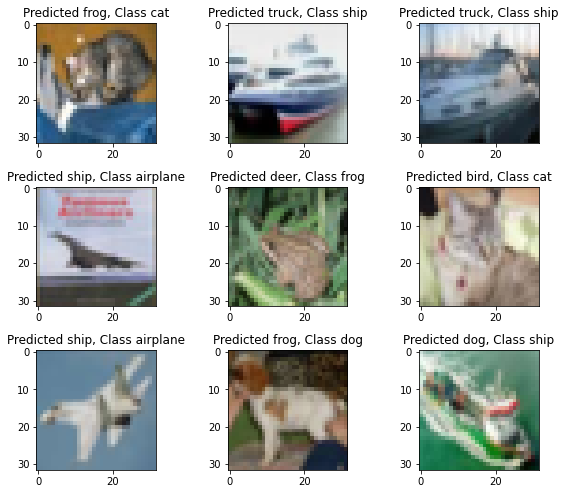

In [45]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(class_name[predicted_classes[incorrect]], class_name[y_test[incorrect]]))
    plt.subplots_adjust(wspace=0.6, hspace=0.01)

# **Exercise**

## Mnist Data

```
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students [4]. Therefore, in the second line, I have separated these two groups as train and test and also separated the labels and the images. x_train and x_test parts contain greyscale RGB codes (from 0 to 255) while y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.
![Example Mnist dataset](https://drive.google.com/open?id=1EjLwrpjtoCgo6kgdVgaMVc-ATxKnGmtn)
```



In [46]:
nb_epochs = 300
batch_size = 32
nb_classes = 10

## Import Mnist Dataset

In [47]:
# To do

### **Solution**

Click below for a solution

In [48]:
mnist = tf.keras.datasets.mnist

In [49]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
y_train, y_test = y_train.reshape(y_train.shape[0]), y_test.reshape(y_test.shape[0])
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


## Create Model MLP

In [50]:
# To Do

### **Solution**

See below for a solution

In [51]:
input = Input(shape = (28,28))
x = Flatten()(input)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(10, activation='softmax')(x)
model_3 = Model(inputs = input, outputs = prediction)

## Add Early stopping, Reduce learning rate and compile

In [52]:
# To Do

### **Solution**

See below for a solution

In [53]:
early_stopping = EarlyStopping(patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=10, min_lr=0.001)
model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Fit model

In [54]:
# To Do

### **Solution**

See below for a solution

In [55]:
h_3 = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epochs,
    validation_data=(x_test, y_test),shuffle=True, callbacks = [early_stopping,reduce_lr])

Train on 60000 samples, validate on 10000 samples
Epoch 1/300
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2214 - accuracy: 0.9330 - val_loss: 0.1048 - val_accuracy: 0.9673
Epoch 2/300
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0982 - accuracy: 0.9700 - val_loss: 0.0737 - val_accuracy: 0.9773
Epoch 3/300
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0703 - accuracy: 0.9778 - val_loss: 0.0682 - val_accuracy: 0.9790
Epoch 4/300
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0553 - accuracy: 0.9821 - val_loss: 0.0749 - val_accuracy: 0.9775
Epoch 5/300
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0423 - accuracy: 0.9857 - val_loss: 0.0657 - val_accuracy: 0.9815
Epoch 6/300
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0358 - accuracy: 0.9883 - val_loss: 0.0638 - val_accuracy: 0.9822
Epoch 7/300
60000/60000 [=========================

## Plot accuracy and loss

In [56]:
history_dict_3 = h_3.history
history_dict_3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

Text(0, 0.5, 'Loss')

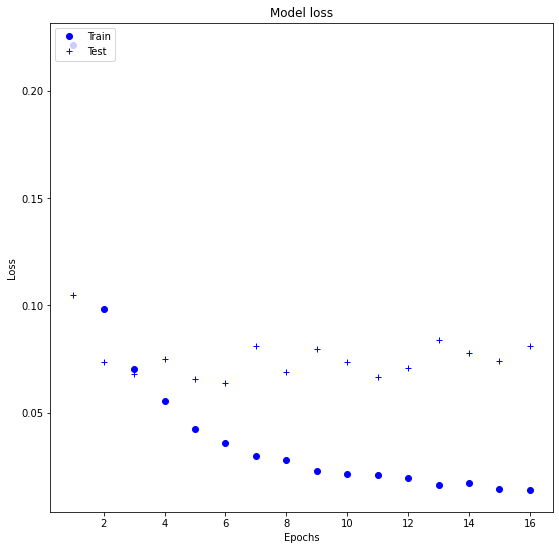

In [57]:
loss_values = history_dict_3['loss']
val_loss_values = history_dict_3['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo')
plt.plot(epochs, val_loss_values, 'b+')
plt.title('Model loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')

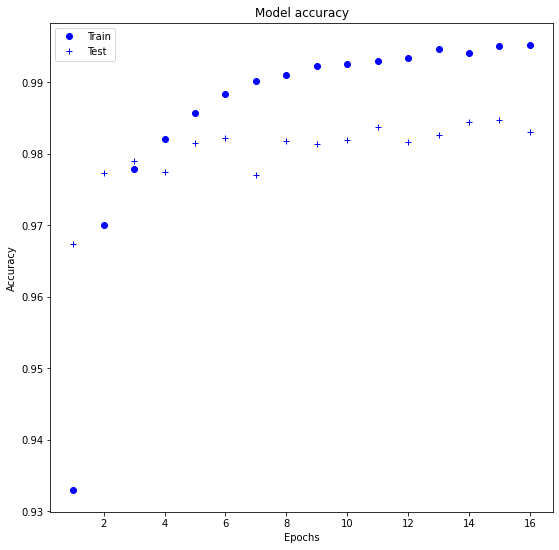

In [58]:
acc_values = history_dict_3['accuracy']
val_acc_values = history_dict_3['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.title('Model accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

## Evaluate

In [59]:
# To Do

### **Solution**

See below for a solution

In [60]:
loss, accuracy = model_3.evaluate(x_train,y_train, verbose=0)
print("Training: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Training: accuracy = 0.998100  ;  loss = 0.005661


In [61]:
loss, accuracy = model_3.evaluate(x_test, y_test, verbose=0)
print("Validation: accuracy = %f  ;  loss = %f" % (accuracy, loss))

Validation: accuracy = 0.983100  ;  loss = 0.080860


## Confusion Matrix

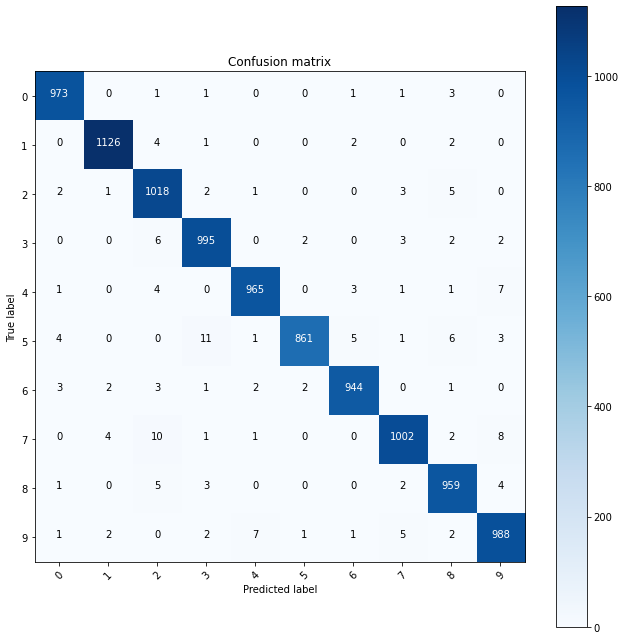

In [62]:
# Predict the values from the validation dataset
Y_pred = model_3.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

## Inspecting output

In [63]:
predicted = model_3.predict(x_test)
predicted_classes = np.argmax(predicted,axis=1)
correct_indices_2 = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices_2 = np.nonzero(predicted_classes != y_test)[0]

In [64]:
print("Number of true predictions: ", len(correct_indices_2))
print("Number of false predictions:", len(incorrect_indices_2))

Number of true predictions:  9831
Number of false predictions: 169


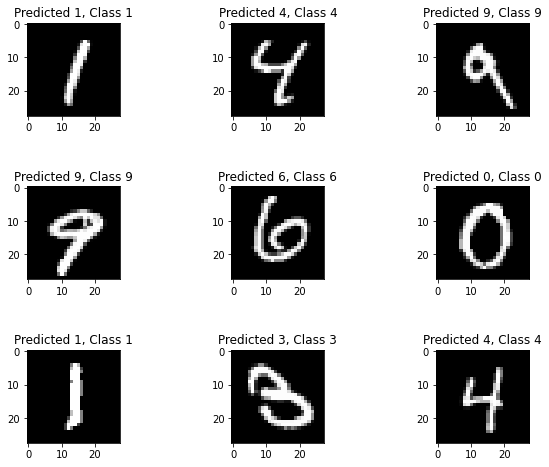

In [65]:
plt.rcParams['figure.figsize'] = (9,9) 
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.subplots_adjust(wspace=1.2, hspace=0.01)

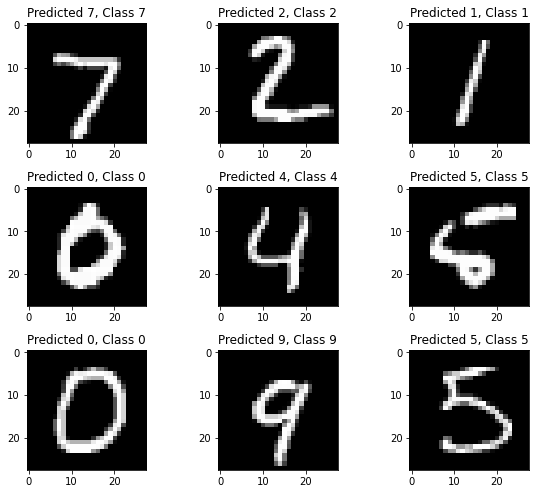

In [66]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.subplots_adjust(wspace=0.6, hspace=0.01)